
### Network representations of institutional structure
Generate the Apache Software Foundation Incubator Community Network. <br/>
Minor differences in topics may be due to UMAP stochasticitiy: https://umap-learn.readthedocs.io/en/latest/reproducibility.html

In [1]:
#Clone repo and install dependencies

!git clone https://github.com/BSAkash/NLP4GOV
!pip install -q -r  ./src/ABDICO_clustering/requirements.txt
!apt-get install poppler-utils
!pip install pdf2image

Cloning into 'NLP4GOV'...
remote: Enumerating objects: 2222, done.
remote: Counting objects: 100% (378/378), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 2222 (delta 208), reused 376 (delta 206), pack-reused 1844
Receiving objects: 100% (2222/2222), 8.73 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (1307/1307), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Download ASF ABDICO parsed data
!wget -O main.csv https://storage.googleapis.com/public_data_c2/IG_datasets/ASF_ABDICO.csv

The network was generated by parsing policy constituents and aggregating similar actors/objects into nodes. Edges are directed from actors to objects and are logarithmically weighted by the number of policies between the pair. Node labels are the top representative words from each cluster. 

/content


INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


nodes:  {'list\ndev,\nnotice,\ndev', 'ipmc,\nipmc\nmember', 'board,\ncommunity', 'disclaimer', 'ppmc,\nmember', 'list\nmailing,\nlist,\nmailing', 'committer', 'project', 'mentor', 'release,\nasf', 'incubator', 'release,\nproject\nrelease'}
nodes:  {'list\ndev,\nnotice,\ndev', 'ipmc,\nipmc\nmember', 'disclaimer', 'board,\ncommunity', 'ppmc,\nmember', 'list\nmailing,\nlist,\nmailing', 'committer', 'project', 'mentor', 'release,\nasf', 'incubator'}
nodes:  {'list\ndev,\nnotice,\ndev', 'ppmc,\nmember', 'board,\ncommunity', 'disclaimer', 'ipmc,\nipmc\nmember', 'project', 'mentor', 'release,\nasf', 'incubator', 'release,\nproject\nrelease'}
nodes:  {'project', 'board,\ncommunity', 'release,\nasf'}


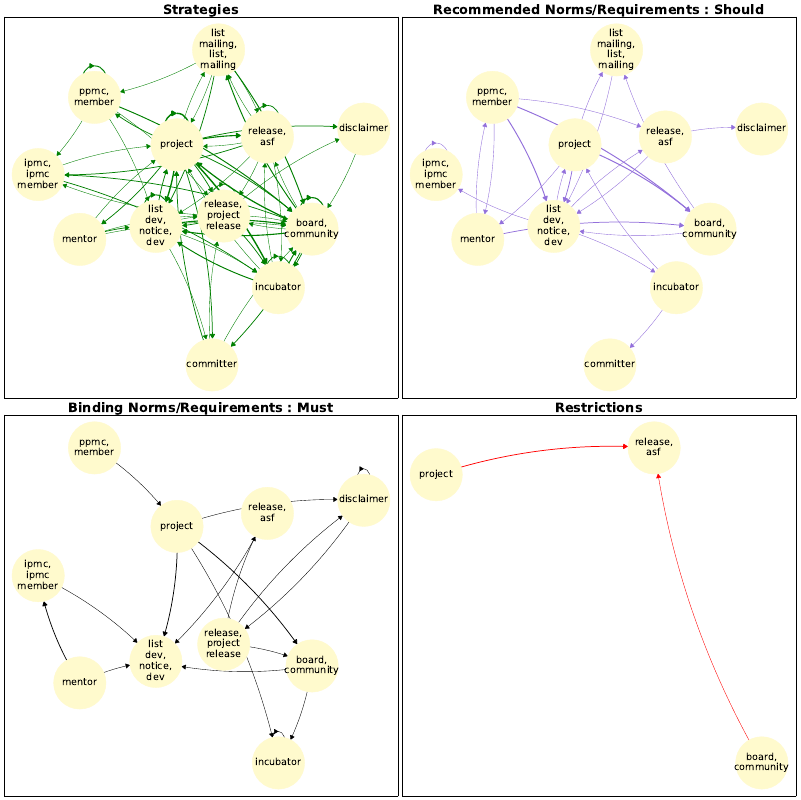

In [12]:
%cd /content
%run -i  ./NLP4GOV/src/ABDICO_clustering/gen_ASF_graph.py

#visualize network
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('ASF_Graph.pdf', 'rb').read(), size=800)
display(images[0])